In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
plt.rcParams["figure.figsize"] = (15,10)
%matplotlib inline

In [2]:
bias_open1 = []
for i in range(92,100):
    im = fits.open('bias/UCD_00%.f.fits' % i)
    bias_open1.append(im[0].data[550:1250,600:1400])

In [3]:
#x -> 550:1250
#y -> 600:1400

In [4]:
np.shape(bias_open1)

(8, 700, 800)

In [5]:
bias_open2 = []
for i in range(100,113):
    im = fits.open('bias/UCD_0%.f.fits' % i)
    bias_open2.append(im[0].data[550:1250,600:1400])

In [6]:
np.shape(bias_open2)

(13, 700, 800)

In [9]:
bias_open3 = []
for i in range(114,133):
    im = fits.open('bias/UCD_0%.f.fits' % i)
    bias_open3.append(im[0].data[1700:2400,1700:2500])

In [10]:
np.shape(bias_open3)

(19, 700, 800)

In [11]:
bias = np.concatenate((bias_open1, bias_open2, bias_open3))

In [12]:
masterbias = np.average(bias, axis=0)
newheader = fits.PrimaryHDU(masterbias)
newheader.writeto('masterbias.fits', overwrite=True)

In [3]:
masterbias = fits.getdata('masterbias.fits')

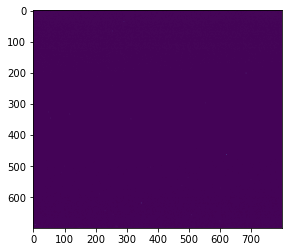

In [20]:
plt.imshow(masterbias[0].data)

In [10]:
Vflats_open = [fits.open('FlatV/UCD_00%.f.fits' % i) for i in range(72,82)]
Vflats = [Vflats_open[i][0].data[550:1250,600:1400] for i in range(len(Vflats_open))]
rVflats = [Vflats[i] - masterbias[0].data for i in range(10)]
masterflatV = np.average(rVflats, axis=0)
masterflatV_norm = masterflatV/(masterflatV[325:375,375:425].mean())

newheader  = fits.PrimaryHDU(masterflatV_norm)
newheader.writeto("masterflatV.fits", overwrite = True)

In [11]:
Bflats_open = [fits.open('FlatB/UCD_00%.f.fits' % i) for i in range(82,92)]
Bflats = [Bflats_open[i][0].data[550:1250,600:1400] for i in range(len(Bflats_open))]
rBflats = [Bflats[i] - masterbias[0].data for i in range(len(Bflats))]
masterflatB = np.average(rBflats, axis=0)
masterflatB_norm = masterflatB/masterflatB[325:375,375:425].mean()

newheader  = fits.PrimaryHDU(masterflatB_norm)
newheader.writeto("masterflatB.fits", overwrite = True)

In [12]:
Rflats_open = [fits.open('FlatR/UCD_0%.f.fits' % i) for i in range(374,384)]
Rflats = [Rflats_open[i][0].data[550:1250,600:1400] for i in range(len(Rflats_open))]
rRflats = [Rflats[i] - masterbias[0].data for i in range(len(Rflats))]
masterflatR = np.average(rRflats, axis=0)
masterflatR_norm = masterflatR/masterflatR[325:375,375:425].mean()

newheader  = fits.PrimaryHDU(masterflatR_norm)
newheader.writeto("masterflatR.fits", overwrite = True)

In [4]:
masterflatV = fits.getdata('masterflatV.fits')
masterflatR = fits.getdata('masterflatR.fits')
masterflatB = fits.getdata('masterflatB.fits')

In [5]:
#Reducing Vband images
im = fits.open('asteroid/UCD_0222.fits')
image = im[0].data[550:1250,600:1400]
reduced = image - (masterbias/masterflatV)
newheader = fits.PrimaryHDU(reduced)
newheader.writeto("red_asteroid/reduced_UCD_0222.fits", overwrite = True)

for i in range(225,285):
    im = fits.open('asteroid/UCD_0%.f.fits' % i)
    image = im[0].data[550:1250,600:1400]
    reduced = image - (masterbias/masterflatV)
    newheader = fits.PrimaryHDU(reduced)
    newheader.writeto("red_asteroid/reduced_UCD_0"+str(i)+".fits", overwrite = True)
for i in range(287,338):
    im = fits.open('asteroid/UCD_0%.f.fits' % i)
    image = im[0].data[550:1250,600:1400]
    reduced = image - (masterbias/masterflatV)
    newheader = fits.PrimaryHDU(reduced)
    newheader.writeto("red_asteroid/reduced_UCD_0"+str(i)+".fits", overwrite = True)

In [8]:
#Reducing Bband images

for i in (223,285):
    im = fits.open('asteroid/B/UCD_0%.f.fits' % i)
    image = im[0].data[550:1250,600:1400]
    reduced = image - (masterbias/masterflatB)
    newheader = fits.PrimaryHDU(reduced)
    newheader.writeto("red_asteroid/reduced_UCD_0"+str(i)+".fits", overwrite = True)

In [9]:
#Reducing Rband images

for i in (224,286):
    im = fits.open('asteroid/R/UCD_0%.f.fits' % i)
    image = im[0].data[550:1250,600:1400]
    reduced = image - (masterbias/masterflatR)
    newheader = fits.PrimaryHDU(reduced)
    newheader.writeto("red_asteroid/reduced_UCD_0"+str(i)+".fits", overwrite = True)